In [23]:
import numpy as np  
from mp_api.client import MPRester  
from pymatgen.phonon.plotter import PhononBSPlotter  
import matplotlib.pyplot as plt  

mp_key = "kHK7l7itQo2c5bLbQQIsHOTh5cQ7HUnw"
mp_id = "mp-20289"

# on récupère la structure du matériau et on sauvegarde cette structure dans un fichier CIF
struct = m.get_structure_by_material_id(material, conventional_unit_cell=True)  # on récupère la structure en cellule unitaire conventionnelle
w = CifWriter(struct)  
w.write_file(material + ".cif")  
print("voici un lien pour télécharger la structure:")
display(FileLink(material + ".cif"))  # on affiche un lien permettant de télécharger le fichier avec la structure


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

voici un lien pour télécharger la structure:


/home/users/r/p/rperger/mp-20289.cif

## structure des bandes de phonons

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

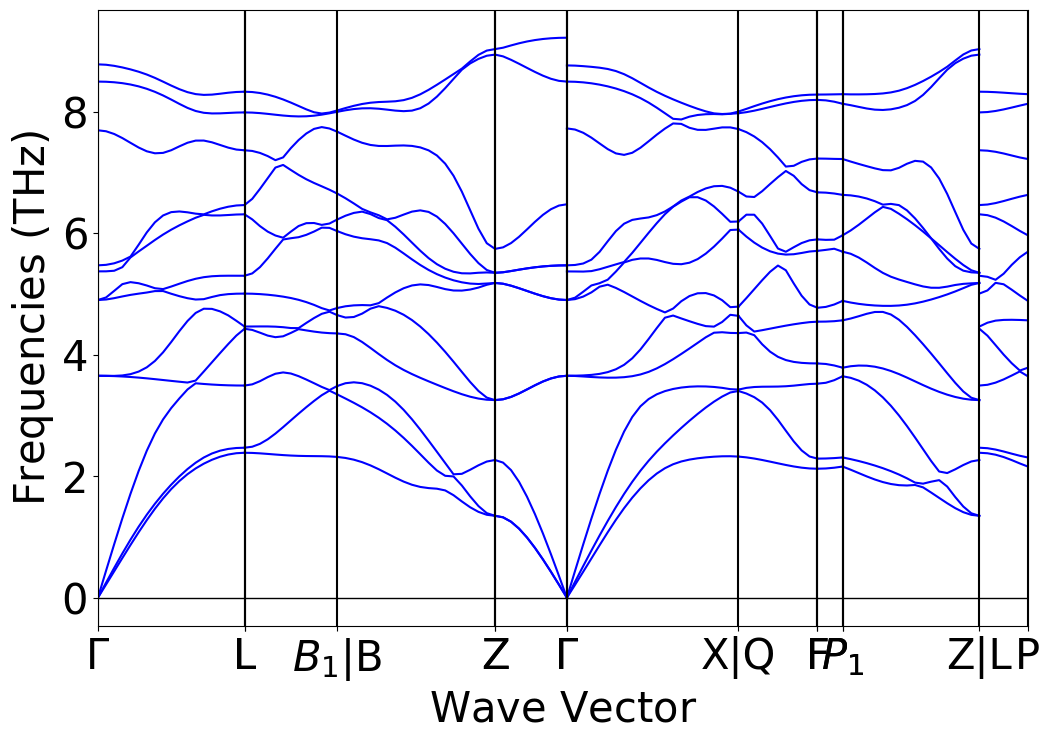

In [24]:
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)  # on récupère la bande de phonons pour le matériau

# on crée un objet plotter pour afficher la structure de bande de phonons
bsplotter = PhononBSPlotter(ph_bs)
bsplotter.show()  # on affiche le graphique de la bande de phonons


## Zone de Brillouin

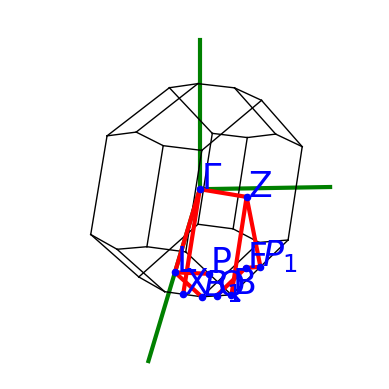

In [25]:
# on trace la zone de Brillouin pour mieux visualiser les points de haute symétrie
bsplotter.plot_brillouin()

## Calcul des vitesses du son pour 3 branches acoustiques

#### On peut avoir la vitesse du son dans le matériau en calculant la valeur absolue de la pente des courbes correspondant aux modes acoustiques quand le vecteur d'onde q tend vers zéro car la vitesse du son est donnée par : v=dω/dk

#### on choisit comme direction: Γ → L,  Γ → B, Γ → Z et donc les segments 0,3 et 4 qui correspondent

La vitesse du son pour la première branche (verte) est de 2541.047615112131 m/s.

La vitesse du son pour la deuxième branche (rouge) est de 296.8363472008003 m/s.

La vitesse du son pour la troisième branche (rose) est de 5150.725937389698 m/s.



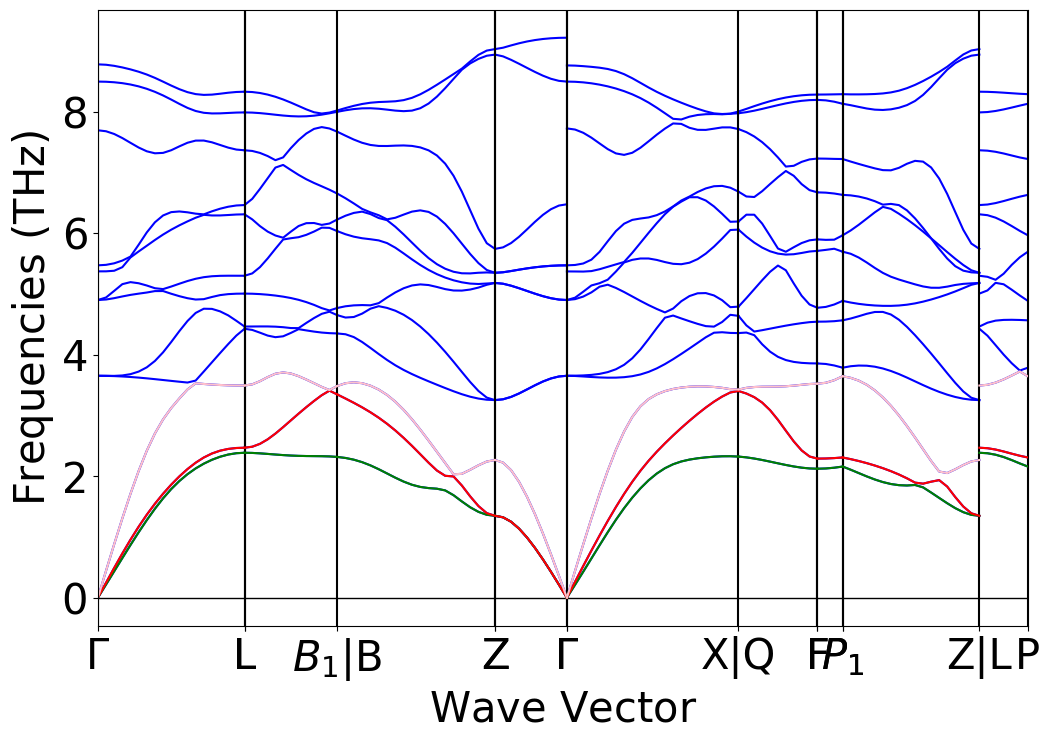

In [27]:
# on récupère le graphique actuel
bsplotter.get_plot()
# on récupère les données de la bande de phonons : distances et fréquences
data = bsplotter.bs_plot_data() 
distance = data.get("distances")  # on extrait la liste des distances le long du chemin dans la zone de Brillouin
frequence = data.get("frequency")  # on extrait la liste des fréquences associées aux différentes branches

# on trace les courbes pour trois branches acoustiques de chaque segment
for i in range(len(distance)):
    plt.plot(distance[i], frequence[i][0], 'green')   # on trace la première branche en vert
    plt.plot(distance[i], frequence[i][1], 'red')       # on trace la deuxième branche en rouge
    plt.plot(distance[i], frequence[i][2], 'pink')      # on trace la troisième branche en rose

# on définit la conversion de distance d'Ångström en mètres
angstrom = 10**(-10)  # on sait que 1 Ångström = 10^-10 m

# on calcule la vitesse du son pour la première branche acoustique (verte)
dist_seg0_1 = distance[0][0] / angstrom  # on convertit la première distance du segment 0 en mètres
dist_seg0_2 = distance[0][1] / angstrom # on convertit la deuxième distance du segment 0 en mètres
freq_seg0_1 = 2 * np.pi * frequence[0][0][0] * 10**(12)  # on convertit la première fréquence (en THz) en pulsation (Hz)
freq_seg0_2 = 2 * np.pi * frequence[0][0][1] * 10**(12)  # on convertit la deuxième fréquence (en THz) en pulsation (Hz)
vitesse_b1 = abs((freq_seg0_2 - freq_seg0_1) / (dist_seg0_2 - dist_seg0_1))  # on calcule la vitesse du son comme la pente absolue (en m/s)
print("La vitesse du son pour la première branche (verte) est de", vitesse_b1, "m/s.\n")

# on calcule la vitesse du son pour la deuxième branche acoustique (rouge)
dist_seg3_1 = distance[3][0] / angstrom  # on convertit la dernière distance du segment 3 en mètres
dist_seg3_2 = distance[3][1] / angstrom  # on convertit l'avant-dernière distance du segment 3 en mètres
freq_seg3_1 = 2 * np.pi * frequence[3][1][0] * 10**(12)  # on convertit la dernière fréquence de la branche 1 du segment 3 en pulsation (Hz)
freq_seg3_2= 2 * np.pi * frequence[3][1][1] * 10**(12)  # on convertit l'avant-dernière fréquence de la branche 1 du segment 3 en pulsation (Hz)
vitesse_b2 = abs((freq_seg3_2 - freq_seg3_1) / (dist_seg3_2 - dist_seg3_1))  # on calcule la vitesse du son pour cette branche
print("La vitesse du son pour la deuxième branche (rouge) est de", vitesse_b2, "m/s.\n")

# on calcule la vitesse du son pour la troisième branche acoustique (rose)
dist_seg4_1 = distance[4][0] / angstrom  # on convertit la première distance du segment 4 en mètres
dist_seg4_2 = distance[4][1] / angstrom  # on convertit la deuxième distance du segment 4 en mètres
freq_seg4_1 = 2 * np.pi * frequence[4][2][0] * 10**(12)  # on convertit la première fréquence de la branche 2 du segment 4 en pulsation (Hz)
freq_seg4_2 = 2 * np.pi * frequence[4][2][1] * 10**(12)  # on convertit la deuxième fréquence de la branche 2 du segment 4 en pulsation (Hz)
vitesse_b3 = abs((freq_seg4_2 - freq_seg4_1) / (dist_seg4_2 - dist_seg4_1))  # on calcule la vitesse du son pour cette branche
print("La vitesse du son pour la troisième branche (rose) est de", vitesse_b3, "m/s.\n")


plt.show()